#Import libraries

In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Data Preprocessing

In [34]:
from tensorflow.keras.datasets import fashion_mnist

In [35]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [37]:
x_train[0].shape

(28, 28)

In [38]:
class_names = ['0 T-shirt/Top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']

In [39]:
class_names

['0 T-shirt/Top',
 '1 Trouser',
 '2 Pullover',
 '3 Dress',
 '4 Coat',
 '5 Sandal',
 '6 Shirt',
 '7 Sneaker',
 '8 Bag',
 '9 Ankle boot']

#Data Exploration

3


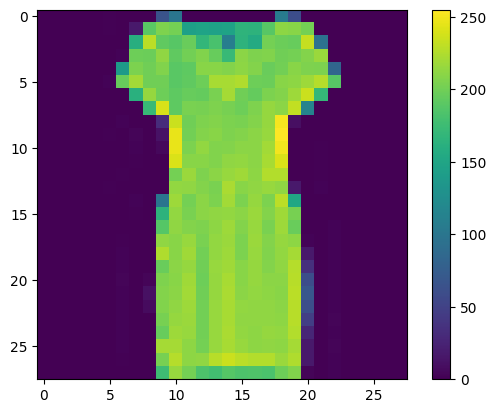

In [40]:
plt.figure()
plt.imshow(x_train[20])
print(y_train[20])
plt.colorbar()

In [41]:
x_train = x_train/255.0
x_test = x_test/255.0

3


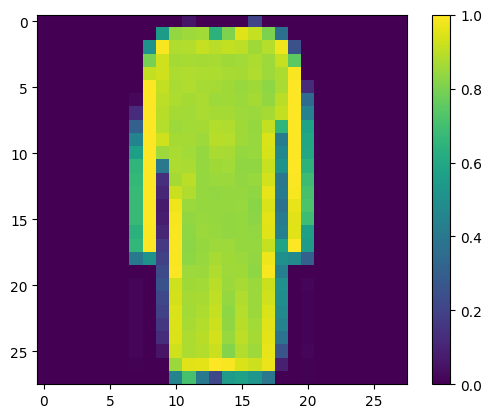

In [42]:
plt.figure()
plt.imshow(x_train[25])
print(y_train[25])
plt.colorbar()

In [43]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [44]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


#Build the model

In [45]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (784,)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [46]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5519 - sparse_categorical_accuracy: 0.8035
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4177 - sparse_categorical_accuracy: 0.8492
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3876 - sparse_categorical_accuracy: 0.8598
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3667 - sparse_categorical_accuracy: 0.8667
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.8712
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3404 - sparse_categorical_accuracy: 0.8751
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3289 - sparse_categorical_accuracy: 0.8791
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3205 - sparse_categorical_accuracy: 0.8816
Epoch 9/10
1875/1875 [=========

#Model evaluation and prediction

In [49]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3560 - sparse_categorical_accuracy: 0.8705


In [50]:
print("Accuracy on test data :", test_accuracy * 100 , "%")

Accuracy on test data : 87.05000281333923 %


In [51]:
x_test.shape

(10000, 784)

In [52]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [53]:
y_pred.shape

(10000, 10)

In [54]:
classes = np.argmax(y_pred, axis = 1)

In [55]:
classes

array([9, 2, 1, ..., 8, 1, 5])

In [56]:
y_test[100], classes[100]

(3, 3)

In [57]:
 #confusion matrix
 from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
cm = confusion_matrix(y_test, classes)

In [59]:
cm

array([[716,   1,  23,  17,   3,   1, 233,   0,   6,   0],
       [  1, 967,   1,  18,   7,   0,   5,   0,   1,   0],
       [ 10,   1, 771,   8,  86,   0, 124,   0,   0,   0],
       [ 23,   9,  13, 881,  25,   0,  48,   0,   1,   0],
       [  0,   0, 101,  37, 745,   0, 117,   0,   0,   0],
       [  0,   0,   0,   0,   0, 939,   0,  42,   0,  19],
       [ 54,   2,  72,  30,  42,   0, 790,   0,  10,   0],
       [  0,   0,   0,   0,   0,   5,   0, 983,   0,  12],
       [  3,   0,   3,   5,   3,   2,   8,   7, 969,   0],
       [  0,   0,   0,   0,   0,   3,   1,  52,   0, 944]])

In [60]:
accuracy_cm = accuracy_score(y_test, classes)

In [61]:
print("Accuracy :", accuracy_cm * 100, "%")

Accuracy : 87.05000000000001 %
